In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import os #システム操作系
import csv
import pickle
from pathlib import Path #ファイル操作系
import json
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


data_size = 100 #配列の大きさ
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
NOISE = 0

現在時刻： 2021-02-05 13:52:13.244884


In [2]:
# グラフの初期設定
plt.rcParams["figure.figsize"] = [3.14, 3.14] # 図の縦横のサイズ([横(inch),縦(inch)])
plt.rcParams["figure.dpi"] = 200 # dpi(dots per inch)
plt.rcParams["figure.facecolor"] = 'white' # 図の背景色
plt.rcParams["figure.edgecolor"] = 'black' # 枠線の色
plt.rcParams["font.family"] = "serif"       # 使用するフォント
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["font.size"] = 14              # 基本となるフォントの大きさ

plt.rcParams["xtick.direction"] = "in"      # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"か
plt.rcParams["ytick.direction"] = "in"      # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"か
plt.rcParams["xtick.bottom"] = True         # 下部に目盛り線を描くかどうか
plt.rcParams["ytick.left"] = True           # 左部に目盛り線を描くかどうか
plt.rcParams["xtick.major.size"] = 5.0      # x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 5.0      # y軸主目盛り線の長さ
plt.rcParams["xtick.major.width"] = 0.3     # x軸主目盛り線の線幅
plt.rcParams["ytick.major.width"] = 0.3     # y軸主目盛り線の線幅
plt.rcParams["xtick.minor.visible"] = False # x軸副目盛り線を描くかどうか
plt.rcParams["ytick.minor.visible"] = False # y軸副目盛り線を描くかどうか
plt.rcParams["xtick.minor.size"] = 2.0      # x軸副目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 2.0      # y軸副目盛り線の長さ
plt.rcParams["xtick.minor.width"] = 0.3     # x軸副目盛り線の線幅
plt.rcParams["ytick.minor.width"] = 0.3     # y軸副目盛り線の線幅
plt.rcParams["xtick.labelsize"] = 8        # 目盛りのフォントサイズ
plt.rcParams["ytick.labelsize"] = 8        # 目盛りのフォントサイズ
plt.rcParams["xtick.major.pad"] = 3.0      # x軸から目盛までの距離
plt.rcParams["ytick.major.pad"] = 4.0      # y軸から目盛までの距離

plt.rcParams["axes.labelsize"] = 10         # 軸ラベルのフォントサイズ
plt.rcParams["axes.linewidth"] = 0.4        # グラフ囲う線の太さ
plt.rcParams["axes.grid"] = False           # グリッドを表示するかどうか

plt.rcParams["mathtext.fontset"] = "stix"  # 数式フォント
plt.rcParams["mathtext.default"] = "default"  # 数式中の文字を立体にする
fn = 'Hiragino Mincho ProN'  # macは多分こっち

In [3]:
# このファイルの存在するフォルダの絶対パスを取得
dir_name = str(Path().resolve())
print('このファイルの存在するフォルダ：', dir_name)

# 保存先フォルダのパス作成
save_folder = os.path.join(dir_name, 'fig_210205')
print('保存フォルダ：', save_folder)

# 保存先フォルダの作成(既に存在する場合は無視される)
os.makedirs(save_folder, exist_ok=True)

このファイルの存在するフォルダ： /Users/nagaiyuma/Documents/myprogram
保存フォルダ： /Users/nagaiyuma/Documents/myprogram/fig_210205


In [11]:
def gaussian_beam(x,i0,x0,w0,h0):
    return  i0 * np.exp(-2*(x-x0)**2/w0**2) + h0
x_array = np.arange(0,200)
param = np.zeros(4)
param[0] = 1.0
param[1] = 100.0
param[2] = 5.0
param[3] = 0.05
intensity = gaussian_beam(x_array, *param)
NOISE = np.zeros(200)
for k in range(200):
    NOISE[k] = np.random.normal(loc=0,scale=0.00765*intensity[k])
noise = np.random.normal(loc=0,scale=0.011,size=200)

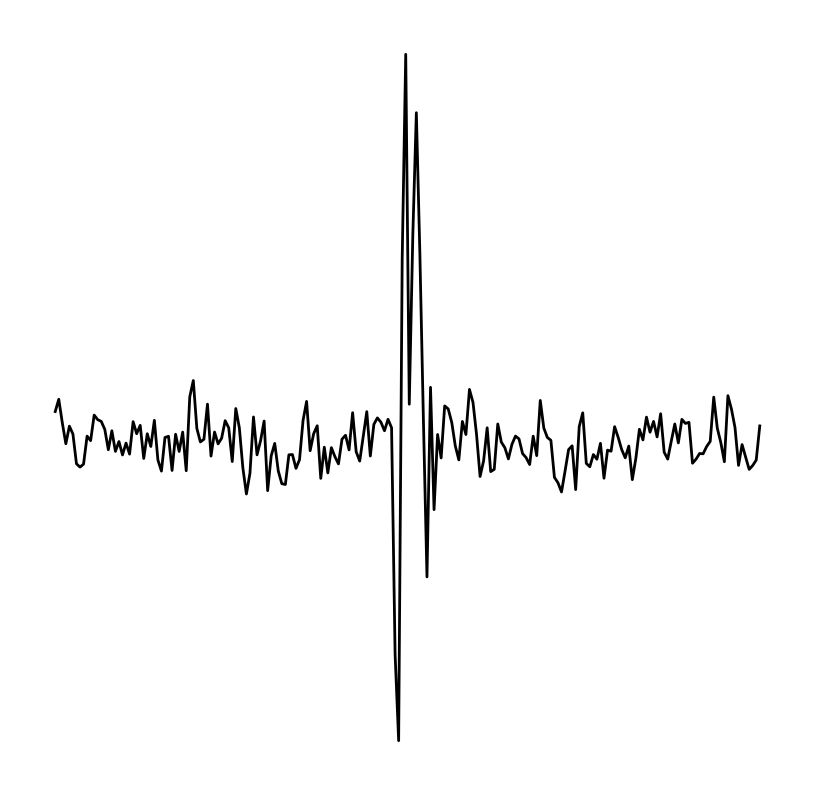

In [21]:
#表示
x_label = '位置' # x軸のラベル
x_unit = r'[$\mu m$]' # x軸の単位，r文字列にして，$で囲えばtex数式表記が使える
y_label = '強度' # y軸のラベル
y_unit = '[a.u.]' # y軸の単位

save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_NOISE.pdf'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

#ax.set_xlabel(x_label, fontname=fn, va='top', ha='right',fontsize=16) # x軸のラベル，右上基準
#ax.xaxis.set_label_coords(0.5, -0.08, transform=ax.transAxes) # x軸のラベル位置調整
#fig.text(0.52, -0.08, x_unit, transform=ax.transAxes, va='top', ha='left') # x軸の単位，左上基準
# 数字いじれば位置が調整できる．グラフの左下を(0,0)とした座標系．

#ax.set_ylabel(y_label, fontname=fn, va='bottom', ha='right',fontsize=16) # y軸のラベル，右上基準
#ax.yaxis.set_label_coords(-0.2, 0.5, transform=ax.transAxes) # y軸のラベル位置調整
#fig.text(-0.2, 0.52, y_unit, rotation=90, transform=ax.transAxes, va='bottom', ha='right') # y軸の単位，右下基準
#ax.set_ylim(-0.1,0.1)
ax.tick_params(bottom=False,
               left=False,
               right=False,
               top=False,
               labelbottom=False,
               labelleft=False,
               labelright=False,
               labeltop=False)
ax.axis("off")
#ax.legend(prop={"family":fn})
ax.grid(False)
ax.plot(x_array, NOISE, color='black',linewidth=1.0)
fig.savefig(save_file, format="pdf", bbox_inches="tight")
plt.show()

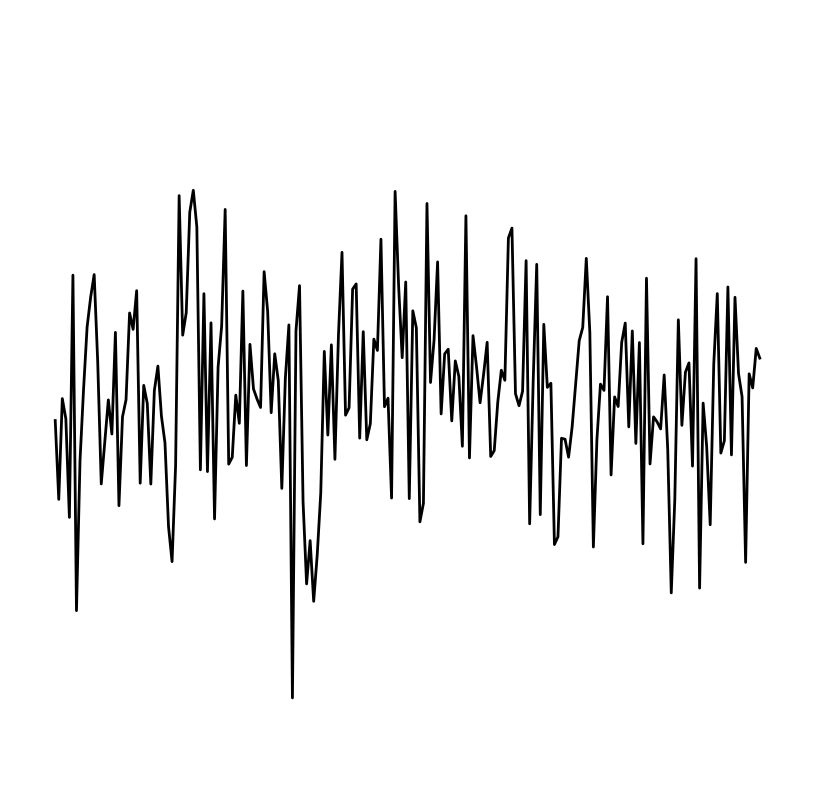

In [20]:
#表示
x_label = '位置' # x軸のラベル
x_unit = r'[$\mu m$]' # x軸の単位，r文字列にして，$で囲えばtex数式表記が使える
y_label = '強度' # y軸のラベル
y_unit = '[a.u.]' # y軸の単位

save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_noise.pdf'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

#ax.set_xlabel(x_label, fontname=fn, va='top', ha='right',fontsize=16) # x軸のラベル，右上基準
#ax.xaxis.set_label_coords(0.5, -0.08, transform=ax.transAxes) # x軸のラベル位置調整
#fig.text(0.52, -0.08, x_unit, transform=ax.transAxes, va='top', ha='left') # x軸の単位，左上基準
# 数字いじれば位置が調整できる．グラフの左下を(0,0)とした座標系．

#ax.set_ylabel(y_label, fontname=fn, va='bottom', ha='right',fontsize=16) # y軸のラベル，右上基準
#ax.yaxis.set_label_coords(-0.2, 0.5, transform=ax.transAxes) # y軸のラベル位置調整
#fig.text(-0.2, 0.52, y_unit, rotation=90, transform=ax.transAxes, va='bottom', ha='right') # y軸の単位，右下基準
ax.set_ylim(-0.05,0.05)
plt.tick_params(labelsize=16)
#ax.legend(prop={"family":fn})
ax.axis("off")
ax.grid(False)
ax.plot(x_array, noise, color='black',linewidth=1.0)
fig.savefig(save_file, format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_gauss+noise{x0}.pdf'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x [pixel]", fontsize=30)
#ax.set_ylabel("y[pixel]", fontsize=16)
ax.set_xlim(0.0,200.0)
ax.set_ylim(0.0,1.2)
plt.tick_params(labelsize=30)
ax.grid(False)
ax.plot(x_array, intensity_noise[n], color='black')
fig.savefig(save_file, format="pdf", bbox_inches="tight")
#plt.show()
print(save_file)